In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

In [2]:
data = mogptk.Data()
data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x), n=20, start=0.0, end=4.0, var=0.03, name='A')
#data.add_function(lambda x: np.sin(6*x)+2, n=20, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

print(data)

Input dims: 2
Output dims: 1
X: [array([[2.544, 1.972],
       [3.244, 4.519],
       [3.033, 4.384],
       [4.339, 1.473],
       [2.34 , 4.141],
       [3.573, 3.542],
       [3.331, 4.609],
       [1.241, 1.155],
       [1.619, 2.883],
       [3.196, 1.814],
       [3.512, 5.124],
       [3.184, 2.098],
       [2.461, 3.423],
       [2.223, 0.58 ],
       [3.031, 1.201],
       [2.429, 1.62 ],
       [2.325, 4.143],
       [3.044, 1.123],
       [2.633, 3.65 ],
       [2.008, 1.35 ],
       [1.662, 1.425],
       [2.623, 0.853],
       [1.315, 1.975],
       [2.319, 4.103],
       [2.083, 1.695],
       [3.673, 4.278],
       [1.354, 1.966],
       [3.827, 2.219],
       [4.097, 1.798],
       [3.482, 2.295],
       [4.173, 2.144],
       [3.093, 3.828],
       [1.873, 1.56 ],
       [1.333, 2.407],
       [1.905, 3.363],
       [4.324, 2.835]])]
Y: [array([1.335, 1.145, 0.455, 0.915, 0.54 , 0.55 , 1.255, 1.455, 0.84 ,
       3.925, 4.227, 2.23 , 0.37 , 0.285, 0.61 , 2.235, 0.505, 

In [55]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

[{'mixture_weights': 0.026235807224907086,
  'mixture_means': array([0.50976435, 0.51928704]),
  'mixture_scales': array([0.56267507, 0.16163386])},
 {'mixture_weights': 0.26413695238435214,
  'mixture_means': array([0.5117629 , 0.85356149]),
  'mixture_scales': array([0.21793754, 0.37548592])},
 {'mixture_weights': 0.858189604490842,
  'mixture_means': array([0.79636817, 0.05122689]),
  'mixture_scales': array([1.32656422, 0.11946121])}]

In [65]:
sm.init_params()
display(sm.get_params())

[[0.87412587 0.39215686]]
[2.544 3.244 3.033 4.339 2.34  3.573 3.331 1.241 1.619 3.196 3.512 3.184
 2.461 2.223 3.031 2.429 2.325 3.044 2.633 2.008 1.662 2.623 1.315 2.319
 2.083 3.673 1.354 3.827 4.097 3.482 4.173 3.093 1.873 1.333 1.905 4.324] (36,)
[] []
(0,) (0,)


ValueError: could not broadcast input array from shape (0) into shape (3)

In [ ]:
sm.train()
display(sm.get_params())

In [ ]:
sm.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=20)
sm.predict()
mogptk.plot(sm)

## MOSM

In [3]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

[{'magnitude': array([-0.69422576]), 'mean': array([[ 0.20164286],
         [-0.20723562]]), 'variance': array([[0.21203312],
         [0.77359319]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.89667001])},
 {'magnitude': array([-0.65395022]), 'mean': array([[ 0.17587895],
         [-0.80787517]]), 'variance': array([[0.13076008],
         [0.02569104]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.59748813])},
 {'magnitude': array([2.58906086]), 'mean': array([[-0.40693236],
         [-0.20175268]]), 'variance': array([[0.26889958],
         [0.83586448]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.2706741])}]

In [10]:
mosm.init_params()
display(mosm.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 51.146965
  Number of iterations: 79
  Number of functions evaluations: 114


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 47.186351
  Number of iterations: 100
  Number of functions evaluations: 122


[{'magnitude': array([1.05861215]), 'mean': array([[6.29620476e-06],
         [1.98263629e+00]]), 'variance': array([[4.90033210e-06],
         [2.64499932e-02]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.89667001])},
 {'magnitude': array([0.0906023]), 'mean': array([[8.54184956e-04],
         [5.97030840e+00]]), 'variance': array([[2.63832824e-01],
         [5.57508763e-06]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.59748813])},
 {'magnitude': array([0.99057133]), 'mean': array([[2.14862481e+01],
         [7.18144245e-06]]), 'variance': array([[2.30865735e-01],
         [1.00105166e-06]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.2706741])}]

In [11]:
mosm.train()
display(mosm.get_params())

Building...
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 44.301343
  Number of iterations: 697
  Number of functions evaluations: 759
Done


[{'magnitude': array([108.88768072]), 'mean': array([[0.0922114 ],
         [2.01294628]]), 'variance': array([[1.90397925e-05],
         [1.01477916e-06]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.94822943])},
 {'magnitude': array([149.57005348]), 'mean': array([[0.22691515],
         [5.90018654]]), 'variance': array([[1.53232632e-06],
         [1.00013573e-06]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.59812899])},
 {'magnitude': array([5.00840131]), 'mean': array([[25.91274103],
         [-0.32190922]]), 'variance': array([[2.84958548e+00],
         [1.00103570e-06]]), 'delay': array([[0.],
         [0.]]), 'phase': array([0.]), 'noise': array([0.32223236])}]

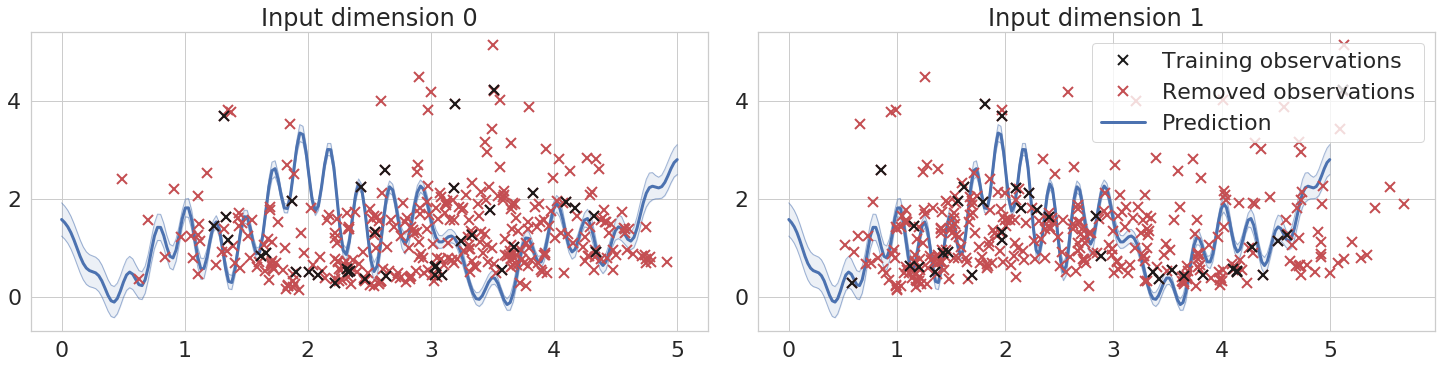

In [15]:
mosm.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=200)
mosm.predict()
mogptk.plot(mosm)

## SM-LMC

In [16]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

[{'constant': array([[-1.52559695]]),
  'mean': array([0.28556971, 0.2882797 ]),
  'variance': array([0.36686204, 0.63686913])},
 {'constant': array([[-0.15601637]]),
  'mean': array([0.9953309 , 0.52579018]),
  'variance': array([0.73634648, 0.95326953])},
 {'constant': array([[0.84227506]]),
  'mean': array([0.24950673, 0.52726189]),
  'variance': array([0.72694974, 0.69805825])}]

In [42]:
smlmc.init_params()
display(smlmc.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 1.482470
  Number of iterations: 79
  Number of functions evaluations: 114


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -1.697426
  Number of iterations: 72
  Number of functions evaluations: 90
(2,)
(3, 2)
(2,)
(4, 2)
(2,)
(5, 2)
{'weight': array([0.        , 0.        , 0.        , 2.1135005 , 1.01090475,
       0.03334643]), 'mean': array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [2.10192748e+00, 5.93416835e+00],
       [1.99716167e+01, 1.99159786e+00],
       [6.28318761e-06, 6.28318531e-06]]), 'scale': array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.00000000e-06, 3.22861751e-04],
       [2.13484867e-06, 2.44671670e-02],
       [1.00007788e-06, 1.00000000e-06]])}
(6, 2)
(2,)


[{'constant': array([[-1.52559695]]),
  'mean': array([2.10192748, 5.93416835]),
  'variance': array([1.00000000e-06, 3.22861751e-04])},
 {'constant': array([[-0.15601637]]),
  'mean': array([19.97161672,  1.99159786]),
  'variance': array([2.13484867e-06, 2.44671670e-02])},
 {'constant': array([[0.84227506]]),
  'mean': array([6.28318761e-06, 6.28318531e-06]),
  'variance': array([1.00007788e-06, 1.00000000e-06])}]

In [43]:
smlmc.train()
display(smlmc.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 52.294374
  Number of iterations: 54
  Number of functions evaluations: 62
Done


[{'constant': array([[-0.27149733]]),
  'mean': array([1.83242636, 6.89940368]),
  'variance': array([1.00000000e-06, 1.04835229e-06])},
 {'constant': array([[-0.37823541]]),
  'mean': array([19.94157647,  1.78026006]),
  'variance': array([2.12338335e-06, 1.00000000e-06])},
 {'constant': array([[1.26619911]]),
  'mean': array([6.28305885e-06, 6.28318874e-06]),
  'variance': array([1.00007788e-06, 1.00000000e-06])}]

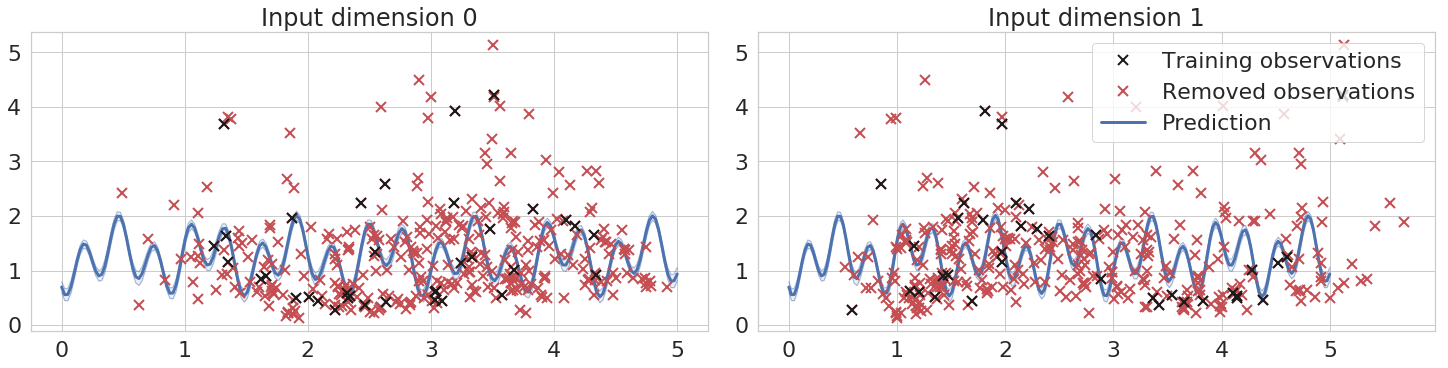

In [45]:
smlmc.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=200)
smlmc.predict()
mogptk.plot(smlmc)

## CSM

In [46]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

[{'constant': array([[0.09275475]]),
  'mean': array([0.51677278, 0.55033993]),
  'variance': array([0.66168428, 0.32594498]),
  'phase': array([[0.]])},
 {'constant': array([[0.94426177]]),
  'mean': array([0.10508273, 0.29890381]),
  'variance': array([0.10567283, 0.71559801]),
  'phase': array([[0.]])},
 {'constant': array([[0.57928846]]),
  'mean': array([0.06092752, 0.16412053]),
  'variance': array([0.97564044, 0.4272975 ]),
  'phase': array([[0.]])}]

In [48]:
csm.init_params()
display(csm.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 3.214240
  Number of iterations: 39
  Number of functions evaluations: 45


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -1.986042
  Number of iterations: 83
  Number of functions evaluations: 106


[{'constant': array([[0.09275475]]),
  'mean': array([6.28394734e-06, 1.90786686e-05]),
  'variance': array([1.00011084e-06, 1.16638405e-06]),
  'phase': array([[0.]])},
 {'constant': array([[0.94426177]]),
  'mean': array([0.01766748, 1.98275621]),
  'variance': array([0.00034097, 0.0285978 ]),
  'phase': array([[0.]])},
 {'constant': array([[0.57928846]]),
  'mean': array([2.29452273, 6.53035589]),
  'variance': array([1.01237915e-06, 9.20435117e-02]),
  'phase': array([[0.]])}]

In [49]:
csm.train()
display(csm.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 46.989488
  Number of iterations: 59
  Number of functions evaluations: 67
Done


[{'constant': array([[1.71095781]]),
  'mean': array([6.28393215e-06, 1.90766329e-05]),
  'variance': array([1.00011084e-06, 1.16186705e-06]),
  'phase': array([[1.e-06]])},
 {'constant': array([[0.47456042]]),
  'mean': array([1.00000038e-06, 1.98573540e+00]),
  'variance': array([1.06665988e-06, 2.93982341e-02]),
  'phase': array([[1.e-06]])},
 {'constant': array([[0.06471306]]),
  'mean': array([0.53305425, 5.81703305]),
  'variance': array([1.01237858e-06, 1.00000000e-06]),
  'phase': array([[1.e-06]])}]

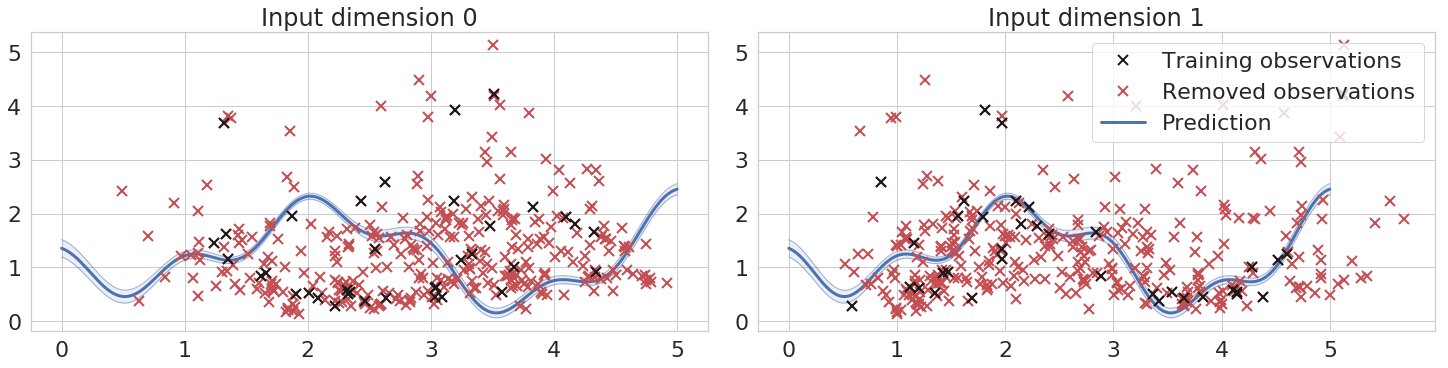

In [50]:
csm.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=200)
csm.predict()
mogptk.plot(csm)

## CG

In [51]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

[{'constant': array([0.80336182]), 'variance': array([[0.58693048],
         [0.92343309]])},
 {'constant': array([0.84337941]), 'variance': array([[0.87562672],
         [0.64721992]])},
 {'constant': array([0.52400805]), 'variance': array([[0.21418684],
         [0.90489079]])}]

In [52]:
cg.init_params()
display(cg.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 51.332962
  Number of iterations: 88
  Number of functions evaluations: 105


INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 47.186351
  Number of iterations: 69
  Number of functions evaluations: 80


[{'constant': array([0.80336182]), 'variance': array([[1.03575936e+01],
         [1.44070267e-06]])},
 {'constant': array([0.84337941]), 'variance': array([[1.00000000e-06],
         [2.64498224e-02]])},
 {'constant': array([0.52400805]), 'variance': array([[6.16822168e+01],
         [1.09242604e-06]])}]

In [53]:
cg.train()
display(cg.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 53.544909
  Number of iterations: 21
  Number of functions evaluations: 26
Done


[{'constant': array([0.35817501]), 'variance': array([[2.92961335e+00],
         [1.44054757e-06]])},
 {'constant': array([1.38134283]), 'variance': array([[1.e-06],
         [1.e-06]])},
 {'constant': array([1.00110009e-06]), 'variance': array([[6.18888923e+01],
         [1.09242641e-06]])}]

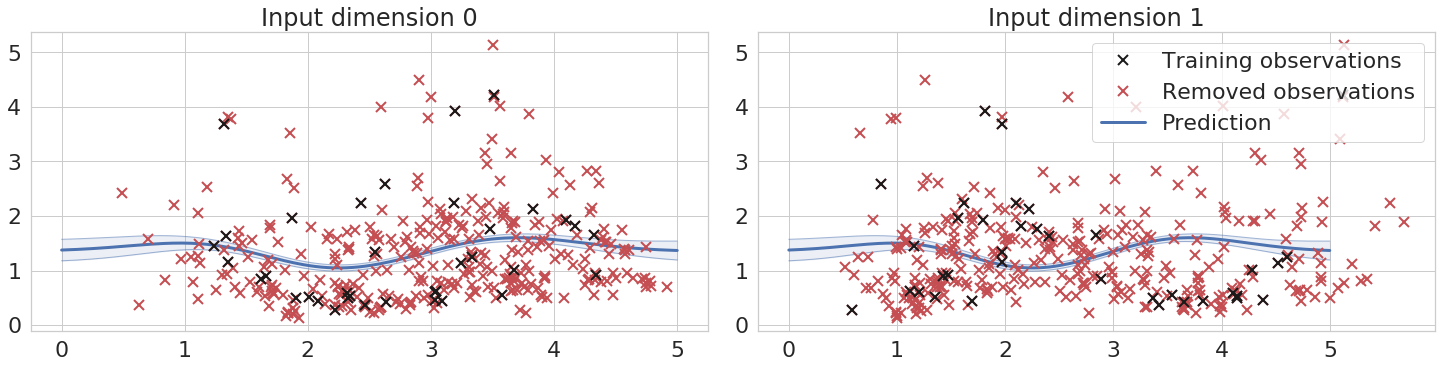

In [54]:
cg.set_prediction_range(0, [0.0, 0.0], [5.0, 5.0], n=200)
cg.predict()
mogptk.plot(cg)